In [1]:
#Importing all the libraries in this space
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from IPython.display import display

In [2]:
#Importing all the libraries in this space
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [3]:
#Reading training data and displaying heads
train = pd.read_excel('TrainingSheet.xlsx')
train.head()

,id,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
0,7950115,Avatar,Avatar,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,2784,9
1,50950115,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows: Part II,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,1328,9
2,119870115,Transformers 3,Transformers: Dark of the Moon,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,1124,9
3,119590115,Toy Story 3,Toy Story 3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,1064,9
4,91700115,Pirates of the Caribbean 4,Pirates of the Caribbean: On Stranger Tides,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,1044,9


In [4]:
#Exploring Shape of the train data
print("Shape of train data", train.shape)

Shape of train data (1196, 15)


In [5]:
#Analyzing the null values if exist
print('Train columns with null values:\n', train.isnull().sum())
print("-"*20)

Train columns with null values:
 id                                    0
name                                  0
display_name                          0
production_year                       0
movie_sequel                          0
creative_type                         0
source                                0
production_method                     0
genre                                 0
language                              0
board_rating_reason                   0
movie_board_rating_display_name       0
movie_release_pattern_display_name    0
total                                 0
Category                              0
dtype: int64
--------------------


In [6]:
#Reviewing summary of the train data
train.describe(include='all')

,id,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
count,1.196000e+03,1196,1196,1196.000000,1196.000000,1196,1196,1196,1196,1196,1196,1196,1196,1196.000000,1196.000000
unique,NaN,1196,1195,NaN,NaN,9,16,6,13,16,1003,6,7,NaN,NaN
top,NaN,Reign Over Me,Death at a Funeral,NaN,NaN,Contemporary Fiction,Original Screenplay,Live Action,Drama,English,International - to be excluded,R,Wide,NaN,NaN
freq,NaN,1,2,NaN,NaN,638,629,1093,321,1144,83,448,795,NaN,NaN
mean,8.928203e+07,NaN,NaN,2008.984950,0.097826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.703177,3.564381
std,4.832893e+07,NaN,NaN,1.383625,0.297204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.927715,1.962417
min,7.011500e+04,NaN,NaN,2007.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,4.808012e+07,NaN,NaN,2008.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,2.000000
50%,9.391012e+07,NaN,NaN,2009.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.500000,3.000000
75%,1.354326e+08,NaN,NaN,2010.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.250000,5.000000


In [7]:
#drop irrelevant features
def cleanDataSet(df):
    file= df.drop([
                   'id', 'name','display_name','board_rating_reason'
                  ], axis = 1)
    return file
train= cleanDataSet(train)

#drop_cols = ["id","name","display_name","board_rating_reason"]
#train= train.drop(drop_cols, axis=1)

In [8]:
#Converting object fields to category type
for column in train.select_dtypes(include=[np.object]).columns:
    train[column]=train[column].astype('category', categories=train[column].unique())
print("-"*20)    
train.dtypes    

--------------------


production_year                          int64
movie_sequel                             int64
creative_type                         category
source                                category
production_method                     category
genre                                 category
language                              category
movie_board_rating_display_name       category
movie_release_pattern_display_name    category
total                                    int64
Category                                 int64
dtype: object

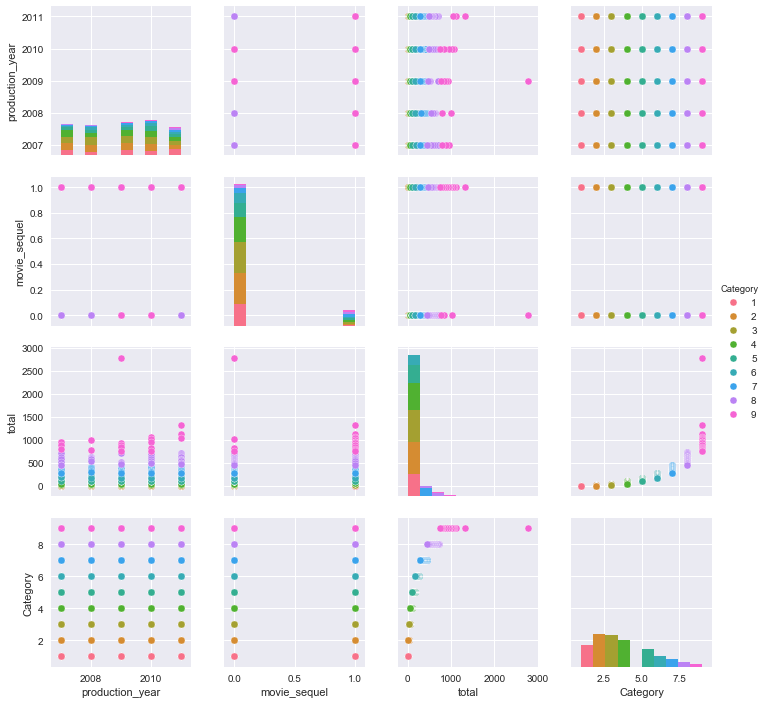

In [9]:
#Basic pairplot visual to see how data is aligned and check outliers
pp = sns.pairplot(train, hue = 'Category',palette="husl")
plt.show()


In [10]:
#Converting Categorical values to dummy for feeding in algorithms
df = pd.get_dummies(data=train, columns= ['creative_type',
                              'source',
                              'movie_sequel',
                              'production_method',
                              'genre',
                              'language',
                              'movie_board_rating_display_name',
                              'movie_release_pattern_display_name'])

In [11]:
#Viewing data after conversion
df.head(5)

,production_year,total,Category,creative_type_Science Fiction,creative_type_Fantasy,creative_type_Kids Fiction,creative_type_Super Hero,creative_type_Historical Fiction,creative_type_Contemporary Fiction,creative_type_Dramatization,...,movie_board_rating_display_name_R,movie_board_rating_display_name_Not Rated,movie_board_rating_display_name_NC-17,movie_release_pattern_display_name_Wide,movie_release_pattern_display_name_Expands Wide,movie_release_pattern_display_name_Limited,movie_release_pattern_display_name_Exclusive,movie_release_pattern_display_name_IMAX,movie_release_pattern_display_name_Special Engagement,movie_release_pattern_display_name_Oscar Qualifying Run
0,2009,2784,9,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2011,1328,9,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2011,1124,9,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2010,1064,9,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2011,1044,9,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [12]:
#Counting the categories films in the train to check class imbalance
df["Category"].value_counts(dropna= False )

2    247
3    245
4    206
1    168
5    132
6     80
7     61
8     38
9     19
Name: Category, dtype: int64

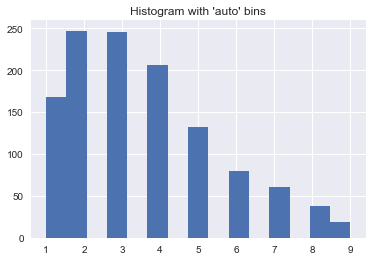

In [13]:
import matplotlib.pyplot as plt
a = np.hstack(df['Category'])            
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [14]:
#Seperating dependent and independent features in train dataset
ind_features = df.drop("Category", axis=1)
dep_feature = df["Category"]
X= ind_features
y= dep_feature

In [3]:
import sys
!{sys.executable} -m pip install imblearn

  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 174kB 1.9MB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 7.9MB 206kB/s ta 0:00:011    50% |████████████████▎               | 4.0MB 3.9MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.19.0
    Uninstalling scikit-learn-0.19.0:
      Successfully uninstalled scikit-learn-0.19.0
You are using pip version 9.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
pip install --upgrade pip


The following command must be run outside of the IPython shell:

    $ pip install --upgrade pip

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [5]:
#SMOTE methodology to balance the imbalance class will 
#help us to learn the data better and reduce bias
#SMOTE is used special plt.show()
import imblearn.over_sampling
from imblearn.over_sampling import SMOTE

In [24]:
smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_sample(X, Y)
plot_2d_space(X_sm, Y_sm, 'SMOTE over-sampling')
X = X_sm
Y = Y_sm

NameError: name 'SMOTE' is not defined

In [15]:
def featureScale(feature,df):
    df.iloc[:,df.columns.get_loc(feature):df.columns.get_loc(feature)+1] = sc_X.fit_transform(df.iloc[:,df.columns.get_loc(feature):df.columns.get_loc(feature)+1])
    return df;

In [16]:
#Scaling the data before modeling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=ind_features.as_matrix().astype(np.float)
X= scaler.fit_transform(X)
y=dep_feature.values

In [17]:
#Printing the shape of the data
print("Shape of features X:",X.shape)
print("Shape of target label y:",y.shape)
print("Unique values present in target label:",np.unique(y))

Shape of features X: (1196, 77)
Shape of target label y: (1196,)
Unique values present in target label: [1 2 3 4 5 6 7 8 9]


In [18]:
#Test and Train Split
X_train, X_test,  y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=100)

In [21]:
#Applying Logistic Regression Classification on test and train split
clf_LR = LogisticRegression(class_weight='balanced')
clfmodelcross= clf_LR.fit(X_train,y_train)
# Predicting the Test set results 
y_pred = clfmodelcross.predict(X_test)
#Accuracy 
print('Accuracy of LOGISTIC REGRESSION classifier on test set: {:.2f}'.format(clfmodelcross.score(X_test, y_test)))
#LR gives low accuracy

Accuracy of LOGISTIC REGRESSION classifier on test set: 0.37


In [22]:
#Applying Linear SVC on test and train split
clf_SVC= LinearSVC()
clfmodelcross=clf_SVC.fit(X_train,y_train)
target_predicted_SVC=clf_SVC.predict(X_test)
#Accuracy 
print('Accuracy of LINEAR SVC classifier on test set: {:.2f}'.format(clfmodelcross.score(X_test, y_test)))
#Gives better accuracy than LR

Accuracy of LINEAR SVC classifier on test set: 0.46


In [27]:
#Applying Gradient Boostong Classifier on test and train split
clf_GB= GBC()
clfmodelcross=clf_GB.fit(X_train,y_train)
target_predicted_GB=clf_GB.predict(X_test)
#Accuracy 
print('Accuracy of GRADIENT BOOSTING classifier on test set: {:.2f}'.format(clfmodelcross.score(X_test, y_test)))
#Accuracy is high but might over fit

Accuracy of GRADIENT BOOSTING classifier on test set: 0.97


In [28]:
#Applying Random Forest Classifier on test and train split
model_RFC=RFC(max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 300)
clfmodelcross=model_RFC.fit(X_train,y_train)
target_predicted_RF=model_RFC.predict(X_test)
#Accuracy 
print('Accuracy of RANDOM FOREST classifier on test set: {:.2f}'.format(clfmodelcross.score(X_test, y_test)))

Accuracy of RANDOM FOREST classifier on test set: 0.80


In [29]:
#Applying Naives Bayes Classifier on test and train split
model_NB=NB()
clfmodelcross=model_NB.fit(X_train,y_train)
target_predicted_NB=model_NB.predict(X_test)
#Accuracy 
print('Accuracy of Naives Bayes classifier on test set: {:.2f}'.format(clfmodelcross.score(X_test, y_test)))

Accuracy of Naives Bayes classifier on test set: 0.09


In [30]:
#Applying Decision Tree Classifier on test and train split
model_DTC=DTC(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
clfmodelcross=model_DTC.fit(X_train,y_train)
target_predicted_DT=model_DTC.predict(X_test)
#Accuracy 
print('Accuracy of DECISION TREE classifier on test set: {:.2f}'.format(clfmodelcross.score(X_test, y_test)))

#Accuracy for RF, DT and GBC are same on test and train split

Accuracy of DECISION TREE classifier on test set: 0.77


In [ ]:
#Applying cross validation techniques (cv, kfold cv, 
#stratified kfold) to see how accuracy varies
#I tried Leave one out cross validation but due to time complexity
#I did not move further with it

In [31]:
# Modeling using cross validation
models_name=['Linear SVC','Logistic Regression','naive_bayes','RandomForestClassifier','DecisionTree','GradientBoostingClassifier']
models_list= [LinearSVC(),LogisticRegression(),NB(),RFC(),DTC(),GBC()]
for i, j in zip(models_name, models_list):
    scores = cross_val_score(j, X,y, cv=5)
    print(i+"-->"+ "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print()


Linear SVC-->Accuracy: 0.44 (+/- 0.11)

Logistic Regression-->Accuracy: 0.36 (+/- 0.03)

naive_bayes-->Accuracy: 0.12 (+/- 0.07)

RandomForestClassifier-->Accuracy: 0.66 (+/- 0.32)

DecisionTree-->Accuracy: 0.81 (+/- 0.46)

GradientBoostingClassifier-->Accuracy: 0.81 (+/- 0.46)



In [32]:
# Modeling using k-fold cross validation
kf=KFold(n_splits=5)
model_name=['Linear SVC','Logistic Regression','naive_bayes','RandomForestClassifier','DecisionTree','GradientBoostingClassifier']
models_list= [LinearSVC(),LogisticRegression(),NB(),RFC(),DTC(),GBC()]
for i, j in zip(model_name, models_list):
    scores = cross_val_score(j, X, y, cv=kf)
    print(i+"--"+ "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print()

Linear SVC--Accuracy: 0.15 (+/- 0.17)

Logistic Regression--Accuracy: 0.12 (+/- 0.10)

naive_bayes--Accuracy: 0.20 (+/- 0.24)

RandomForestClassifier--Accuracy: 0.42 (+/- 0.41)

DecisionTree--Accuracy: 0.63 (+/- 0.66)

GradientBoostingClassifier--Accuracy: 0.63 (+/- 0.66)



In [33]:
# Modeling using cross validation
skf = StratifiedKFold(n_splits=5)
model_name=['Linear SVC','Logistic Regression','naive_bayes','RandomForestClassifier','DecisionTree','GradientBoostingClassifier']
models_list= [LinearSVC(),LogisticRegression(),NB(),RFC(),DTC(),GBC()]
for i, j in zip(model_name, models_list):
    scores = cross_val_score(j, X, y, cv=skf)
    #print(scores)
    print(i+"--"+ "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print()

Linear SVC--Accuracy: 0.44 (+/- 0.11)

Logistic Regression--Accuracy: 0.36 (+/- 0.03)

naive_bayes--Accuracy: 0.12 (+/- 0.07)

RandomForestClassifier--Accuracy: 0.65 (+/- 0.33)

DecisionTree--Accuracy: 0.81 (+/- 0.46)

GradientBoostingClassifier--Accuracy: 0.81 (+/- 0.46)



In [34]:
#Consistently we see that RF, DT and GBC perform well. Since DT has a nature of overfitting I will not use it for final modeling

In [35]:
#Reading scoring sheet
test= pd.read_excel("Scoringsheet.xlsx")
test.head()

,id,name,display_name,production_budget,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name
0,7970115,"Avengers, The (2011)",Marvel's The Avengers,225000000,2012,0,Super Hero,Based on Comic/Graphic Novel,Live Action,Adventure,English,for intense sequences of sci-fi violence and a...,PG-13,Wide
1,174540115,Dark Knight Rises The,The Dark Knight Rises,0,2012,1,Super Hero,Based on Comic/Graphic Novel,Live Action,Action,English,"for intense sequences of violence and action, ...",PG-13,Wide
2,149080115,Bond 23,Skyfall,200000000,2012,1,Contemporary Fiction,Based on Fiction Book/Short Story,Live Action,Action,English,"for intense violent sequences throughout, some...",PG-13,Wide
3,136020115,Twilight Saga Breaking Dawn Part 2 The,"The Twilight Saga: Breaking Dawn, Part 2",136200000,2012,1,Fantasy,Based on Fiction Book/Short Story,Live Action,Drama,English,for sequences of violence including disturbing...,PG-13,Wide
4,53500115,"Hobbit, The",The Hobbit: An Unexpected Journey,270000000,2012,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for extended sequences of intense fantasy acti...,PG-13,Wide


In [36]:
#Printing shape of scoring data
print("Shape of scoring data is:",test.shape)

Shape of scoring data is: (91, 14)


In [37]:
#Analyzing the null values of scoring sheet
print('Test columns with null values:\n', test.isnull().sum())
print("-"*20)

Test columns with null values:
 id                                    0
name                                  0
display_name                          0
production_budget                     0
production_year                       0
movie_sequel                          0
creative_type                         0
source                                0
production_method                     0
genre                                 0
language                              0
board_rating_reason                   0
movie_board_rating_display_name       0
movie_release_pattern_display_name    0
dtype: int64
--------------------


In [38]:
#Selecting the common columns in test and train data
a = np.intersect1d(train.columns, test.columns)
print (a)

['creative_type' 'genre' 'language' 'movie_board_rating_display_name'
 'movie_release_pattern_display_name' 'movie_sequel' 'production_method'
 'production_year' 'source']


In [39]:
#test= cleanDataSet(test)
drop_cols = ["id","name","display_name","board_rating_reason","production_budget"]
test= test.drop(drop_cols, axis=1)

In [40]:
#Converting object to categorical variables
for column in test.select_dtypes(include=[np.object]).columns:
    test[column] = test[column].astype('category', categories = test[column].unique())

In [41]:
display(test.dtypes)

production_year                          int64
movie_sequel                             int64
creative_type                         category
source                                category
production_method                     category
genre                                 category
language                              category
movie_board_rating_display_name       category
movie_release_pattern_display_name    category
dtype: object

In [42]:
#Dummifying the values
test = pd.get_dummies(data=test, columns= ['creative_type',
                              'source',
                              'movie_sequel',
                              'production_method',
                              'genre',
                              'language',
                              'movie_board_rating_display_name',
                              'movie_release_pattern_display_name'])

In [43]:
display(X.shape)
display(test.shape)

(1196, 77)

(91, 49)

In [ ]:
'''for column in test:
    if(column not in X.column):
        X= X.drop([column],axis=1).values'''

In [44]:
# Get missing columns in the training test
missing_cols = set(pd.DataFrame(X)) - set(pd.DataFrame(test))
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test[c] = 0
# Setting order of test columns same as X
test = test[pd.DataFrame(X).columns]

In [45]:
print("Shape of training data :",X.shape)
print("Shape of Test data :",test.shape)

Shape of training data : (1196, 77)
Shape of Test data : (91, 77)


In [46]:
#Using all the algorithms used in cross validation and test 
#and train split to perform final analysis, but I will be 
#considering Random Forest and Gradient Boosting Classifier as top picks

In [48]:
clf_SVC= LinearSVC()
clf_SVC.fit(X,y)
score_prediction_SVC=clf_SVC.predict(test)
Predictions= pd.DataFrame(score_prediction_SVC).to_excel('score_prediction_LinearSVC.xlsx')

In [ ]:
#test['Category_Predicted'] = score_prediction_SVC

In [ ]:
# Make cross validated predictions
#predictions = cross_val_score(target_predicted_SVC, X, y, cv=6)
#plt.scatter(y, predictions)

In [49]:
clf_LR = LogisticRegression(class_weight='balanced')
clf_LR.fit(X,y)
score_prediction_LR = clf_LR.predict(test)
Predictions= pd.DataFrame(score_prediction_LR).to_excel('score_prediction_LR.xlsx')

In [51]:
clf_NB = NB()
clf_NB.fit(X,y)
score_prediction_NB = clf_NB.predict(test)
Predictions= pd.DataFrame(score_prediction_NB).to_excel('score_prediction_NB.xlsx')

In [52]:
clf_RF=RFC(max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 300)
clf_RF.fit(X,y)
score_predicted_RF=clf_RF.predict(test)
Predictions= pd.DataFrame(score_predicted_RF).to_excel('score_prediction_RFC.xlsx')

In [53]:
clf_DTC=DTC(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
clf_DTC.fit(X,y)
score_predicted_DT=clf_DTC.predict(test)
Predictions= pd.DataFrame(score_predicted_DT).to_excel('score_prediction_DT.xlsx')

In [56]:
#Visualizaing the tree generated by Decision Tree algorithm
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_DTC, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

In [55]:
clf_GB= GBC()
clf_GB.fit(X,y)
score_predicted_GBC=clf_GB.predict(test)
Predictions= pd.DataFrame(score_predicted_GBC).to_excel('score_prediction_GBC.xlsx')

In [ ]:
#In conclusion Random Forest and Gradient Boostong 
#Classifier should work best for scoring data